In [1]:
import numpy as np
import alpha_neuron as an
import importlib
importlib.reload(an)

<module 'alpha_neuron' from '/home/owner/Projects/the_worm_project/alpha_neuron.py'>

In [2]:
from matplotlib import pyplot as plt

In [3]:
V = np.array([-40.0, -40.0])
G_syn = np.array([[0.0, 100.0], [100.0, 0.0]])
G_gap = np.array([[0.0, 0.0], [0.0,0.0]])

net = an.NeuronNetwork(V, G_syn, G_gap, v_clamp=np.array([0, 1]))

In [4]:
net.simple_run(0.001, 3.0)

##########

## Synapse loop

##########

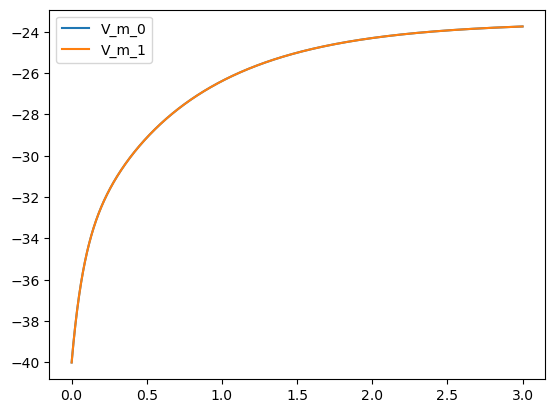

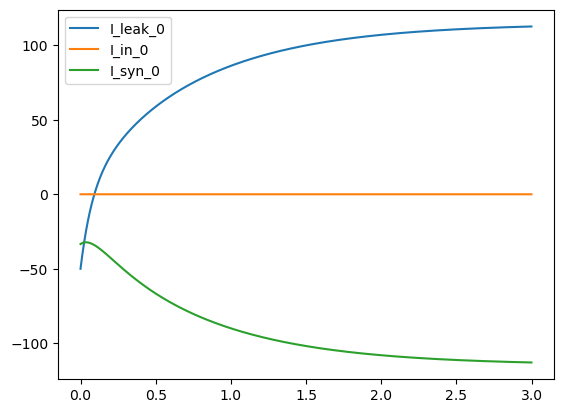

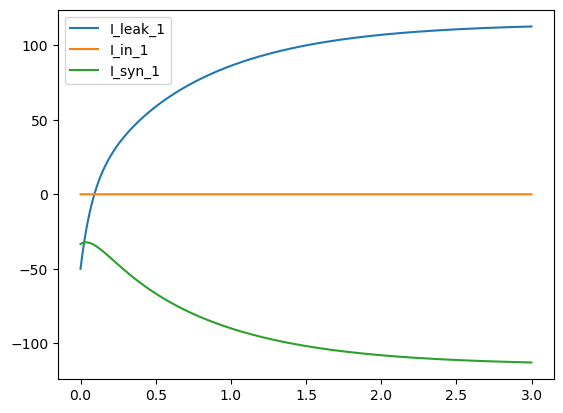

In [5]:
volts = np.array([-40.0, -40.0])
syn = np.array([[0.0, 100.0], [100.0, 0.0]])
gap = np.array([[0.0, 0.0], [0.0,0.0]])
sim = an.NeuronNetwork(volts, syn, gap)
sim.simple_run(0.001, 3.0)
sim.show_all_data()

## Synapse x Voltage response

In [6]:
simulations = []

for j in range(1, 20, 2):

    results = []
    for i in range(0, 300, 10):
        volts = np.array([-200.0 + i, -40.0])
        syn = np.array([[0.0, 100.0], [j * 100.0, 0.0]])
        gap = np.array([[0.0, 0.0], [0.0,0.0]])
        sim = an.NeuronNetwork(volts, syn, gap, v_clamp=np.array([0, 1]))
        sim.simple_run(0.001, 3.0, show_progress=False)
        results.append(sim.syn_store[-1][0])
    simulations.append(results)
        


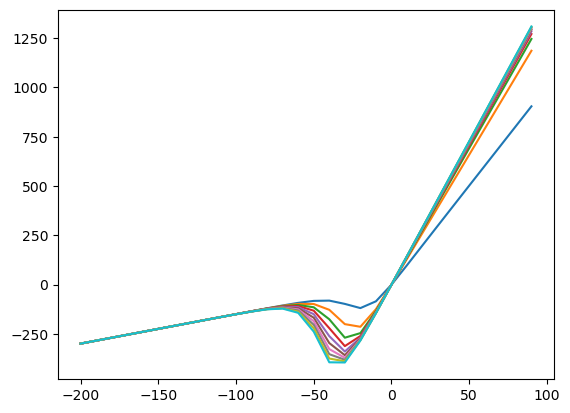

In [7]:
volts_x = [-200.0 + i for i in range(0, 300, 10)]
for sim in simulations:
    plt.plot(volts_x, sim)
plt.show()

## Gap Jn Voltage Response

In [37]:
simulations = []

for j in range(1, 20, 2):

    results = []
    for i in range(0, 300, 10):
        volts = np.array([-200.0 + i, -40.0])
        syn = np.array([[0.0, 0.0], [0.0, 0.0]])
        gap = np.array([[0.0, j * 100.0], [j * 100.0,0.0]])
        sim = an.NeuronNetwork(volts, syn, gap, v_clamp=np.array([0, 1]))
        sim.simple_run(0.001, 3.0, show_progress=False)
        results.append(sim.gap_store[-1][0])
    simulations.append(results)
        

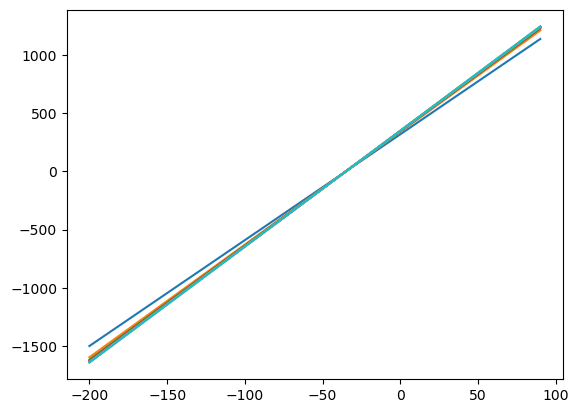

In [38]:
volts_x = [-200.0 + i for i in range(0, 300, 10)]
for sim in simulations:
    plt.plot(volts_x, sim)
plt.show()

# Numeric Stability

In [59]:
results = []
deltas = [0.2, 0.1, 0.05, 0.01, 0.001, 0.0001]
I_gen = lambda t : np.array([0]) if t < 2.0 or t > 3.0 else np.array([50])
for delta_t in deltas:
    volts = np.array([-60.0])
    gap = np.array([[0.0]])
    syn = np.array([[0.0]])
    sim = an.NeuronNetwork(volts, gap, syn)
    sim.adv_run(delta_t, 5.0, I_gen)
    results.append([sim.t_store, sim.V_store])

###############################################################

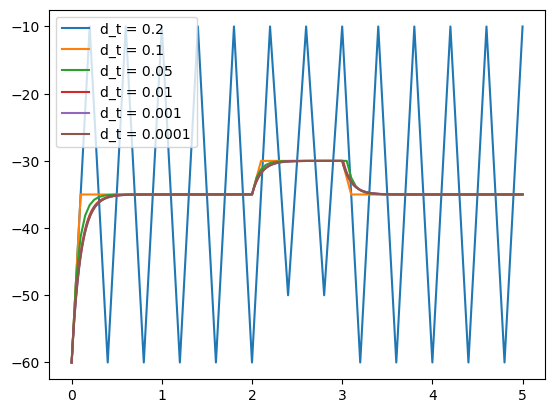

In [60]:
for i, res in enumerate(results):
    plt.plot(res[0], res[1], label=f"d_t = {deltas[i]}")
plt.legend(loc='best')
plt.show()

### With Huge Current

##################################################

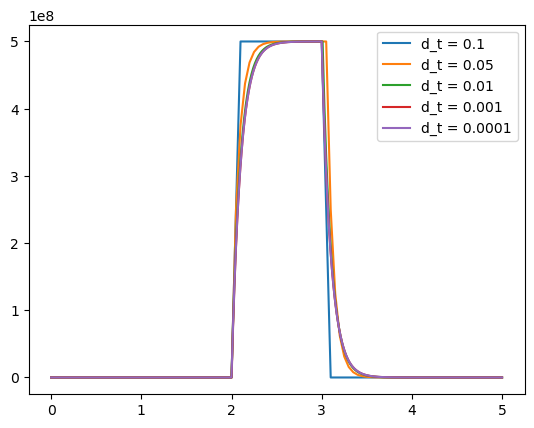

In [66]:
results = []
deltas = [0.1, 0.05, 0.01, 0.001, 0.0001]
I_gen = lambda t : np.array([0]) if t < 2.0 or t > 3.0 else np.array([5000000000])
for delta_t in deltas:
    volts = np.array([-60.0])
    gap = np.array([[0.0]])
    syn = np.array([[0.0]])
    sim = an.NeuronNetwork(volts, gap, syn)
    sim.adv_run(delta_t, 5.0, I_gen)
    results.append([sim.t_store, sim.V_store])

for i, res in enumerate(results):
    plt.plot(res[0], res[1], label=f"d_t = {deltas[i]}")
plt.legend(loc='best')
plt.show()